# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
plt.style.use('dark_background')

# Data Loading

In [3]:
!git clone https://github.com/alleFarell/Datasets-ML.git

fatal: destination path 'Datasets-ML' already exists and is not an empty directory.


In [4]:
df = pd.read_csv('Datasets-ML/forestfires.csv', sep=',', na_values='?')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#Exploratory Data Analysis


Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

In [5]:
# Dataframe Shape
print('Total records:', df.shape[0])
print('Total features:', df.shape[1])

Total records: 517
Total features: 13


In [6]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
df.duplicated().sum()

4

In [8]:
# Identifikasi colom numerical dan categorical
cat_col = [i for i in df.select_dtypes(include='object')]
num_col = [i for i in df.select_dtypes(include='number')]

In [9]:
# Data Summary
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


## Data Visualization


### Burned Area & Burned Report Count each Month

Text(0.5, 1.0, 'burned report count')

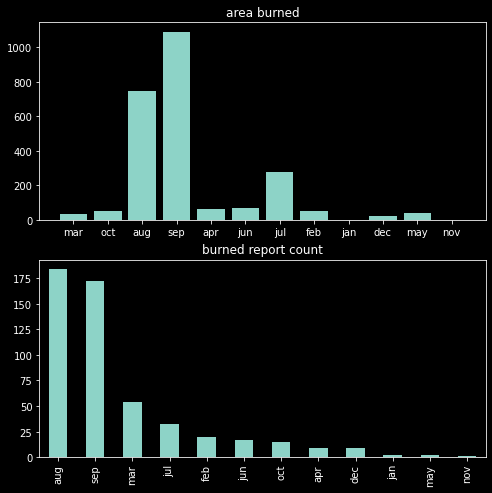

In [10]:
fig, axs= plt.subplots(2, figsize=(8,8))
axs[0].bar(df["month"], df["area"])
axs[0].set_title("area burned")

df["month"].value_counts().plot(kind="bar", ax= axs[1])
axs[1].set_title("burned report count")

### Attribute Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95dbddb890>,
      dtype=object)

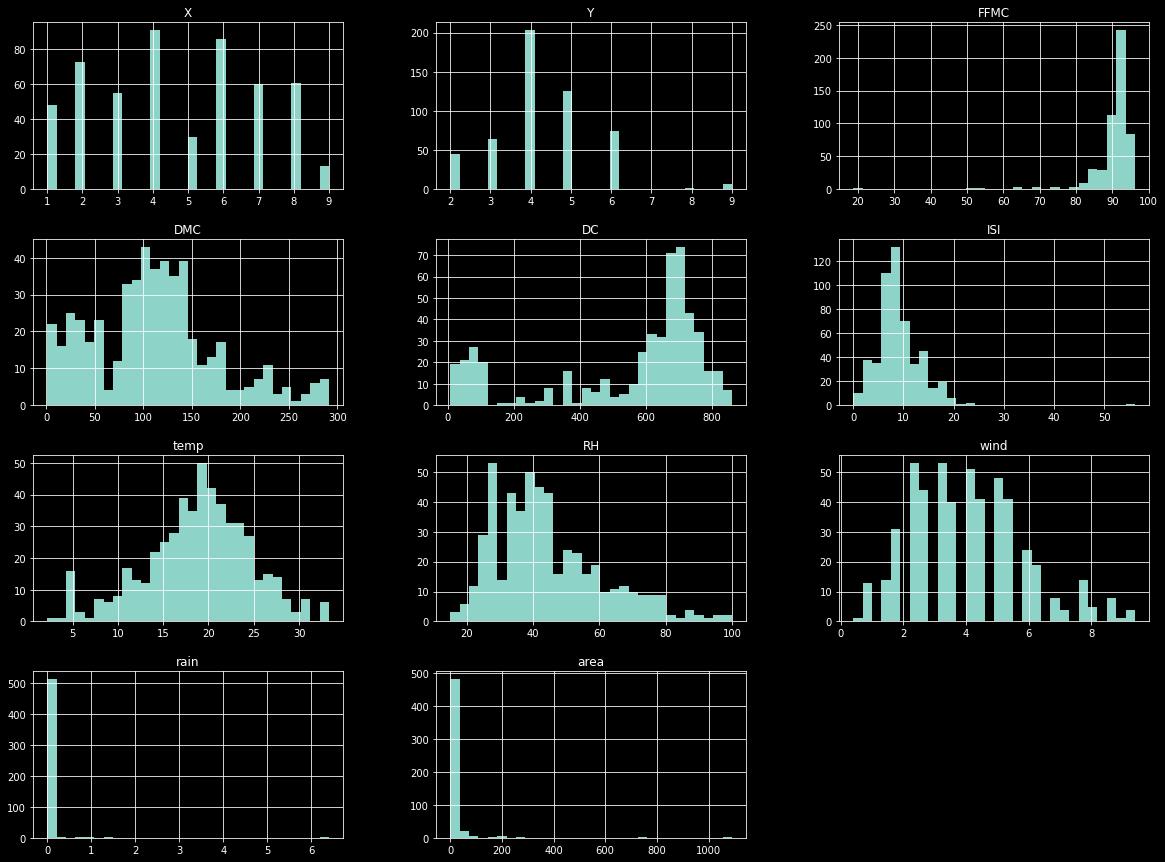

In [11]:
df.hist(bins=30, figsize=(20,15))

### Scatter Plot of Burned Area Coordinates

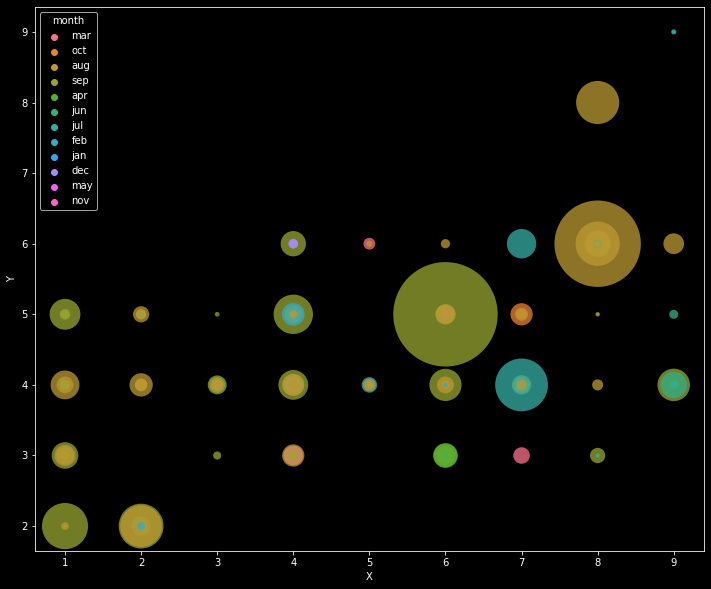

In [12]:
# Scattetplot
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['X'], y=df['Y'], hue=df['month'], s=10*df['area'], alpha=0.76)

### Heatmap of Linear Correlation of each Attribute

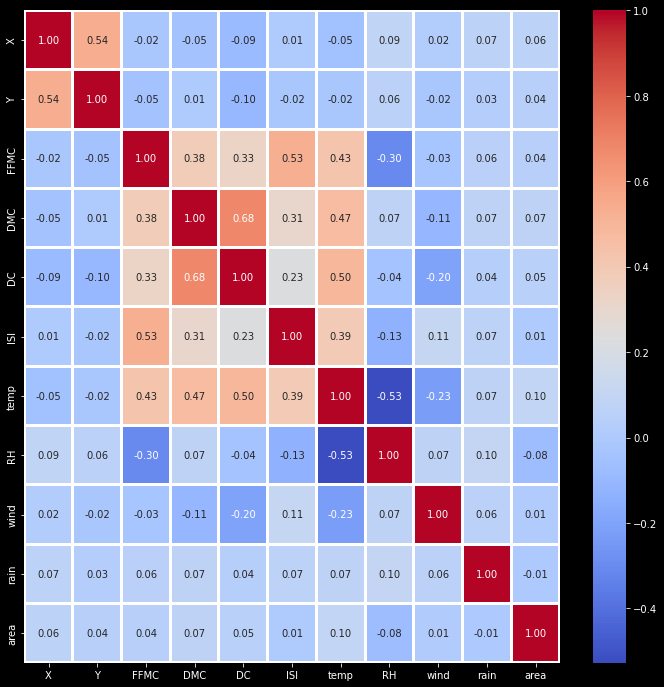

In [13]:
### LINEAR CORRELATION
plt.figure(figsize=(12,12))
linearCorr = df.corr()
sns.heatmap(linearCorr, annot=True, fmt='.2f', linewidths= 2, cmap="coolwarm")

Regarding the classification problem, all features showing a linear correlation with 'burning' are close to zero, meaning that the occurrence or absence of forest fires is not linearly correlated with any attribute. However, there are attributes that are correlated with each other, which is "DC" with "month", "DMC", and "temp". therefore it can be represented by only one attribute, namely "DC". In addition, there are X and Y which are also correlated, X will be taken as the representative of the two.

## Outliers

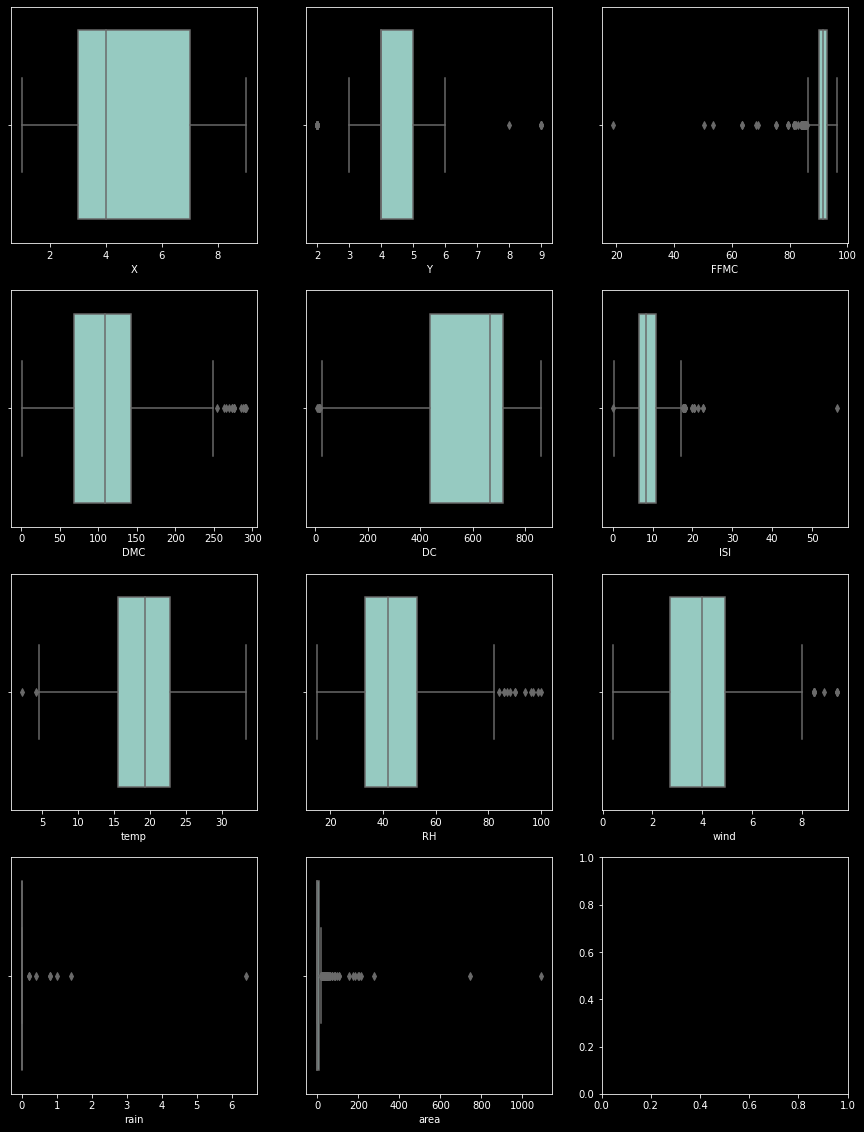

In [14]:
# Membuat boxplot untuk menampilkan pencilan / outliers pada numerical features
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15,20))
for i, ax in zip(df[num_col], axes.flat):
    sns.boxplot(x=df[i], ax=ax)
plt.show()

# Data Preprocessing

## Categorizing Burned Area Damage

Tujuan kali ini adalah untuk membuat prediksi potensi klasifikasi terjadinya kebakaran hutan. Pada percobaan pertama, kolom continuous "area" yang menyatakan besar area yang terkena kebakaran hutan akan diubah menjadi diskrit dengan 2 kategori sebagai berikut :

- 0 jika area yang terbakar = 0

- 1 jika area yang terbakar > 0


Sedangkan di percobaan kedua, kolom yang sama akan diubah menjadi 5 kategori :

- 0 jika = 0.0 (No Damage)

- 1 jika kurang dari sama dengan 1 (low)

- 2 jika lebih dari 1 dan kurang dari sama dengan 25 (moderate)

- 3 jika lebih dari 25 dan kurang dari sama dengan 100 (high)

- 4 jika lebih dari 100 (very high)



In [15]:
# Categorizing severity of forest fire based on area
def burned(area):
  if (area != 0):
    return 0
  else:
    return 1

def burned_category(area):
    if area == 0.0:
        return 0
    elif area <= 1:
        return 1
    elif area <= 25:
        return 2
    elif area <= 100:
        return 3
    else:
        return 4

df['burned'] = df['area'].apply(burned)
df['damage_category'] = df['area'].apply(burned_category)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,burned,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1,0


In [16]:
df.burned.value_counts()

0    270
1    247
Name: burned, dtype: int64

In [17]:
df.damage_category.value_counts()

0    247
2    191
3     41
1     27
4     11
Name: damage_category, dtype: int64

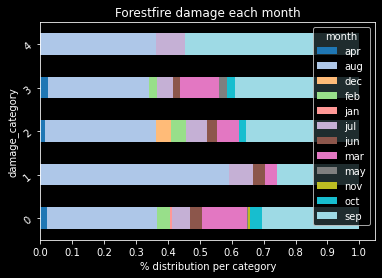

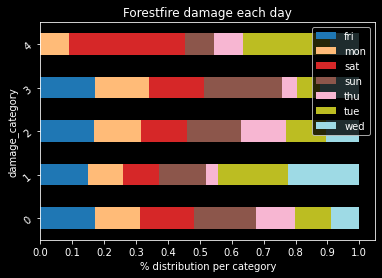

In [18]:
for col in cat_col:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='tab20')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))

plt.legend(loc='upper right')
plt.show()

## Data Encoding

Merubah nilai pada atribut 'month' menjadi numerical menggunakan Label Encoding

In [19]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

## Features Selection

Berdasarkan bagian EDA, untuk menghindari multicollinearity maka atribut 'DC' harus di drop. Sedangkan atribut 'day' juga akan di drop karena memiliki distribusi yang rata untuk memprediksi kebakaran.

In [20]:
df_new = df
df_new.drop('DC', axis=1, inplace=True)
df_new.drop('day', axis=1, inplace=True)
df_new

,X,Y,month,FFMC,DMC,ISI,temp,RH,wind,rain,area,burned,damage_category
0,7,5,3,86.2,26.2,5.1,8.2,51,6.7,0.0,0.00,1,0
1,7,4,10,90.6,35.4,6.7,18.0,33,0.9,0.0,0.00,1,0
2,7,4,10,90.6,43.7,6.7,14.6,33,1.3,0.0,0.00,1,0
3,8,6,3,91.7,33.3,9.0,8.3,97,4.0,0.2,0.00,1,0
4,8,6,3,89.3,51.3,9.6,11.4,99,1.8,0.0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,81.6,56.7,1.9,27.8,32,2.7,0.0,6.44,0,2
513,2,4,8,81.6,56.7,1.9,21.9,71,5.8,0.0,54.29,0,3
514,7,4,8,81.6,56.7,1.9,21.2,70,6.7,0.0,11.16,0,2
515,1,4,8,94.4,146.0,11.3,25.6,42,4.0,0.0,0.00,1,0


# Data Preparation

## Define Features and Label

- Label 1 adalah atribut 'burned' (2 kategori) untuk eksperimen pertama
- Label 2 adalah artibut 'damage_category' (5 kategori) untuk eksperimen kedua

In [21]:
from tensorflow.keras.utils import to_categorical

features = df_new.drop(['area', 'burned', 'damage_category'], axis=1)
label_1 = to_categorical(df_new.burned)
label_2 = to_categorical(df_new.damage_category)

## Data Scaling & Data Splitting

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scaling data with Standard Scaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Train-Test Split
X_train, X_test, y_train1, y_test1 = train_test_split(features, label_1, test_size=0.3, random_state=42)
X_train, X_test, y_train2, y_test2 = train_test_split(features, label_2, test_size=0.3, random_state=42)

# Building Models

In [23]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

def fit_model(trainX, trainy, validX, validy, n_input, n_output, n_batch, n_epoch, 
              earlystop, layers, neurons, functions, opt, loss_function):
    # define model
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=n_input, activation=functions[0], kernel_initializer='he_uniform'))
    for i in range(1,(layers-2)):
            model.add(Dense(neurons[i], activation=functions[i]))
    model.add(Dense(n_output, activation=functions[layers-1]))

    # compile model
    #opt = SGD(lr=learning_rate, momentum=0.9)
    model.compile(loss=loss_function, optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=n_epoch, callbacks=[earlystop], verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()
      
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, valid_acc = model.evaluate(validX, validy, verbose=0)
    diff = train_acc-valid_acc
    print('Batch=%.3f, showed accuracy of Train: %.3f, Valid: %.3f, Difference: %.3f' % (int(n_batch), train_acc, valid_acc, diff))

# Training Models

## Experiment 1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Batch=4.000, showed accuracy of Train: 0.654, Valid: 0.564, Difference: 0.090
Batch=8.000, showed accuracy of Train: 0.598, Valid: 0.583, Difference: 0.015
Batch=16.000, showed accuracy of Train: 0.715, Valid: 0.622, Difference: 0.093
Batch=32.000, showed accuracy of Train: 0.634, Valid: 0.603, Difference: 0.032
Batch=64.000, showed accuracy of Train: 0.640, Valid: 0.577, Difference: 0.063
Batch=128.000, showed accuracy of Train: 0.593, Valid: 0.590, Difference: 0.003


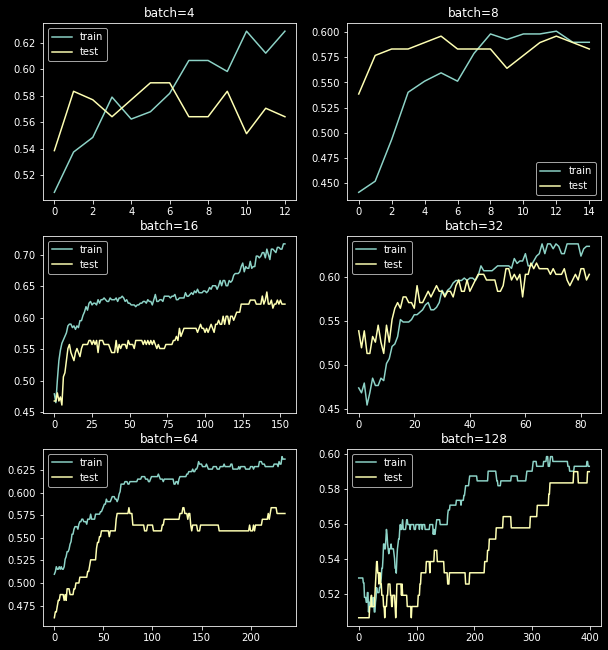

In [24]:
# create learning curves for different batch sizes
n_input = 10
n_output = 2
epoch_iter = 400
layers = 5 #hidden layer+output
neurons = [30,30,30,30] #untuk hidden layer
functions = ['relu','relu','relu','relu','softmax']
opt = SGD(lr=0.001, momentum=0.9)
earlystop_callback = EarlyStopping(monitor='val_loss',patience=10)
loss_function='binary_crossentropy'

batch_sizes = [4,8,16,32,64,128]
plt.figure(figsize=(10, 15))

for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train1, X_test, y_test1,  n_input, n_output, batch_sizes[i], epoch_iter, 
              earlystop_callback, layers, neurons, functions, opt, loss_function)
  
# show learning curves
plt.show()

## Experiment 2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Batch=4.000, showed accuracy of Train: 0.540, Valid: 0.474, Difference: 0.066
Batch=8.000, showed accuracy of Train: 0.524, Valid: 0.442, Difference: 0.081
Batch=16.000, showed accuracy of Train: 0.518, Valid: 0.494, Difference: 0.024
Batch=32.000, showed accuracy of Train: 0.490, Valid: 0.455, Difference: 0.035
Batch=64.000, showed accuracy of Train: 0.496, Valid: 0.455, Difference: 0.041
Batch=128.000, showed accuracy of Train: 0.507, Valid: 0.442, Difference: 0.065


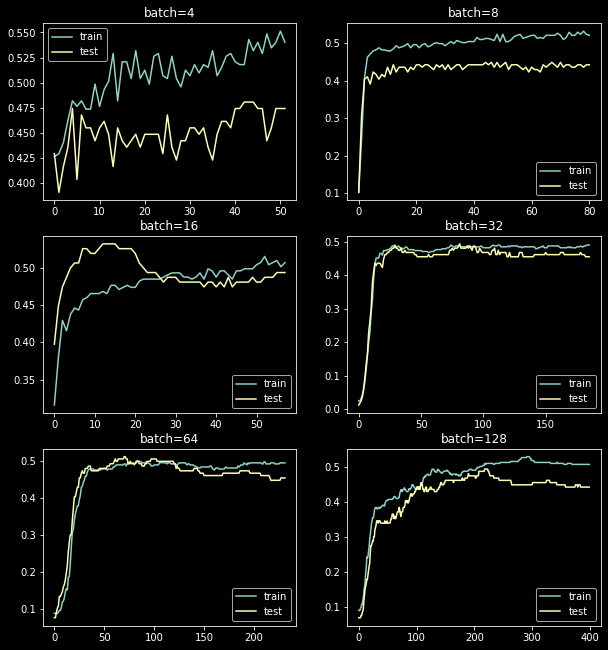

In [25]:
# create learning curves for different batch sizes
n_input = 10
n_output = 5
epoch_iter = 400
layers = 5 #hidden layer+output
neurons = [30,30,30,30] #untuk hidden layer
functions = ['relu','relu','relu','relu','softmax']
opt = SGD(lr=0.001, momentum=0.9)
earlystop_callback = EarlyStopping(monitor='val_loss',patience=10)
loss_function='binary_crossentropy'

batch_sizes = [4,8,16,32,64,128]
plt.figure(figsize=(10, 15))

for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train2, X_test, y_test2,  n_input, n_output, batch_sizes[i], epoch_iter, 
              earlystop_callback, layers, neurons, functions, opt, loss_function)
  
# show learning curves
plt.show()

## Experiment 3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Batch=16.000, showed accuracy of Train: 0.540, Valid: 0.487, Difference: 0.053
Batch=128.000, showed accuracy of Train: 0.529, Valid: 0.506, Difference: 0.023


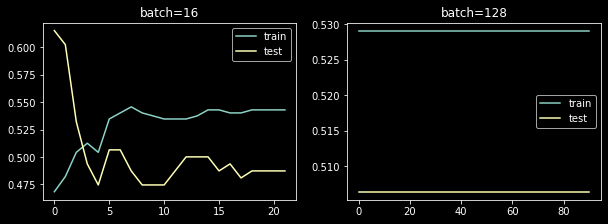

In [26]:
# create learning curves for different batch sizes
n_input = 10
n_output = 2
epoch_iter = 400
layers = 10 #hidden layer+output
neurons = [30,30,30,30,30,30,30,30,30] #untuk hidden layer
functions = ['relu','relu','relu','relu','relu','relu','relu','relu','relu','softmax']
opt = SGD(lr=0.001, momentum=0.9)
earlystop_callback = EarlyStopping(monitor='val_loss',patience=10)
loss_function='binary_crossentropy'

batch_sizes = [16,128]
plt.figure(figsize=(10, 15))

for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train1, X_test, y_test1,  n_input, n_output, batch_sizes[i], epoch_iter, 
              earlystop_callback, layers, neurons, functions, opt, loss_function)
  
# show learning curves
plt.show()

## Experiment 4 

## Experiment 5

# Benchmarking with Traditional Machine Learning

## Decision Tree

In [27]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc= DecisionTreeClassifier(criterion="gini", max_depth=10)
dtc.fit(X_train, y_train1)

ypred= dtc.predict(X_train, check_input=True)
print("train acc:", accuracy_score(y_train1, ypred))

ypred= dtc.predict(X_test, check_input=True)
print("validation acc: ", accuracy_score(y_test1, ypred))

train acc: 0.96398891966759
validation acc:  0.5
